# Objective
Binning of all the numerical variables using the Information Value concpet.

### Importing Necessary Liabraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading The Dataset

In [2]:
data=pd.read_csv("Data_Lcv.csv")
data.head(5)

,Apac_no,Appl,Party_id,EMI_START_DATE,Apac Effective Date,LOGIN_DATE,Customer_Segment,IND_MIS_Classification,STATE,LOCATION,...,Pk _delay_across all loans,Pk delay across all loans L6M,Pk delay across all loans L12M,Pk delay across all CV loans,Pk delay across all CV loans L6M,Pk dly across all CV loans L12M,Tm_frt_Cv_loan,Tm_Lst_Cv_loan,Max_DPD_Apac_level_18,Flag
0,LCV371157,LCV,184284120,20-Jan-16,23-Dec-15,21-Dec-15,RETAIL2,REAL ESTATE RENTING AND BUSINESS ACTIVITIES,TAMIL NADU,KELAMBAKKA,...,90,90,90,30,30,30,2410,761,0,0
1,LCV396469,LCV,59870390,05-May-16,31-Mar-16,16-Feb-16,NONSRTO,TRANSPORT STORAGE AND COMMUNICATIONS,PUNJAB,LUDHIANA,...,30,0,0,0,0,0,0,0,27,0
2,LCV469970,LCV,49019656,10-Sep-16,12-Aug-16,10-Aug-16,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,TAMIL NADU,SALEM,...,30,0,30,30,0,30,1502,1502,0,0
3,LCV456630,LCV,42998157,05-Aug-16,05-Jul-16,21-Jun-16,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,RAJASTHAN,JAIPUR,...,32,30,30,0,0,0,1252,1252,0,0
4,LCV322140,LCV,9126225,10-Oct-15,04-Sep-15,10-Aug-15,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,GUJARAT,AHMD_CHDR,...,30,30,30,30,30,30,1519,242,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6634 entries, 0 to 6633
Data columns (total 49 columns):
Apac_no                             6634 non-null object
Appl                                6634 non-null object
Party_id                            6634 non-null int64
EMI_START_DATE                      6634 non-null object
Apac Effective Date                 6634 non-null object
LOGIN_DATE                          6634 non-null object
Customer_Segment                    6634 non-null object
IND_MIS_Classification              6634 non-null object
STATE                               6634 non-null object
LOCATION                            6634 non-null object
BORROWER_AGE                        6634 non-null int64
COBORROWER_AGE                      6634 non-null int64
GUARANTOR_AGE                       6634 non-null int64
CIBIL_SCORE                         6634 non-null int64
NEW_EXISTING                        6634 non-null object
RESIDENTIAL_TYPE                    6634 no

In [4]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6634 entries, 0 to 6633
Data columns (total 14 columns):
Apac_no                   6634 non-null object
Appl                      6634 non-null object
EMI_START_DATE            6634 non-null object
Apac Effective Date       6634 non-null object
LOGIN_DATE                6634 non-null object
Customer_Segment          6634 non-null object
IND_MIS_Classification    6634 non-null object
STATE                     6634 non-null object
LOCATION                  6634 non-null object
NEW_EXISTING              6634 non-null object
RESIDENTIAL_TYPE          6634 non-null object
MODE_OF_PAYMENT           6634 non-null object
RELIGION                  6634 non-null object
Asset Make                6634 non-null object
dtypes: object(14)
memory usage: 725.7+ KB


### Deleting Unnecessary columns

In [5]:
data.drop(["Appl",'Max_DPD_Apac_level_18'],axis=1,inplace=True)

In [6]:
col=[]
for c in data.columns.tolist():
    new=c.replace(' ','_')
    col.append(new.capitalize())
data.columns=col

In [7]:
data.columns

Index(['Apac_no', 'Party_id', 'Emi_start_date', 'Apac_effective_date',
       'Login_date', 'Customer_segment', 'Ind_mis_classification', 'State',
       'Location', 'Borrower_age', 'Coborrower_age', 'Guarantor_age',
       'Cibil_score', 'New_existing', 'Residential_type',
       'Free_vehicles_fleet', 'Total_vehicles_fleet', 'Free_fleet_ratio',
       'No_vehicles_financed_kmbl', 'No_vehicles_financed_other',
       'Mode_of_payment', 'Religion', 'Asset_make', 'Agr_value', 'Asset_value',
       'Loan_to_value', 'Total_no_loan_', 'Total_no_live_loan',
       'Total_no_closed_loan', 'Total_no_secured_loan',
       'Total_no_of_live_secured_loans', 'Total_no_unsecured_loan',
       'Total_no_of_live_unsecured_loans', 'Total_no.of_cv_loan',
       'No_of_live_cv_loans_', 'No_of_closed_cv_loans_', 'Max_hgh_crdt_amt',
       'Max_hgh_amt_all__cv_lns', 'Pk__delay_across_all_loans',
       'Pk_delay_across_all_loans_l6m', 'Pk_delay_across_all_loans_l12m',
       'Pk_delay_across_all_cv_loans

In [8]:
data.shape

(6634, 47)

### Null Values - Identification and Treatment¶

In [9]:
data.isna().sum()

Apac_no                                0
Party_id                               0
Emi_start_date                         0
Apac_effective_date                    0
Login_date                             0
Customer_segment                       0
Ind_mis_classification                 0
State                                  0
Location                               0
Borrower_age                           0
Coborrower_age                         0
Guarantor_age                          0
Cibil_score                            0
New_existing                           0
Residential_type                       0
Free_vehicles_fleet                 1203
Total_vehicles_fleet                   0
Free_fleet_ratio                       0
No_vehicles_financed_kmbl           1203
No_vehicles_financed_other          1203
Mode_of_payment                        0
Religion                               0
Asset_make                             0
Agr_value                              0
Asset_value     

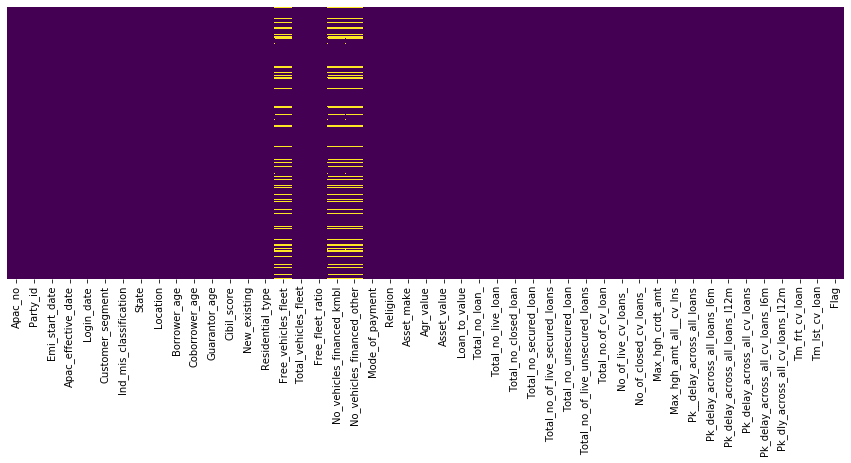

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [11]:
data.dropna(subset=["Asset_value"],inplace=True)

In [12]:
data.isna().sum()

Apac_no                                0
Party_id                               0
Emi_start_date                         0
Apac_effective_date                    0
Login_date                             0
Customer_segment                       0
Ind_mis_classification                 0
State                                  0
Location                               0
Borrower_age                           0
Coborrower_age                         0
Guarantor_age                          0
Cibil_score                            0
New_existing                           0
Residential_type                       0
Free_vehicles_fleet                 1203
Total_vehicles_fleet                   0
Free_fleet_ratio                       0
No_vehicles_financed_kmbl           1203
No_vehicles_financed_other          1203
Mode_of_payment                        0
Religion                               0
Asset_make                             0
Agr_value                              0
Asset_value     

We can see still there are 1203 missing values in these three columns: 
    1. Free_vehicles_fleet
    2. No_vehicles_financed_kmbl
    3. No_vehicles_financed_other
Let us have a look at the data with respect to these three columns and the total fleet vehicles.

In [13]:
data[["Total_vehicles_fleet","Free_vehicles_fleet","No_vehicles_financed_kmbl","No_vehicles_financed_other"]][data.Free_vehicles_fleet.isna()]

,Total_vehicles_fleet,Free_vehicles_fleet,No_vehicles_financed_kmbl,No_vehicles_financed_other
8,0,NaN,NaN,NaN
10,0,NaN,NaN,NaN
12,0,NaN,NaN,NaN
27,0,NaN,NaN,NaN
29,0,NaN,NaN,NaN
31,0,NaN,NaN,NaN
43,0,NaN,NaN,NaN
44,0,NaN,NaN,NaN
48,0,NaN,NaN,NaN
65,0,NaN,NaN,NaN


The above ouput shows that all the 1203 rows which have null values for the three columns are null because the value in the total_vehicles_fleet column is 0. This basically means that the applicant does not own any vehicle. As there is no vehicle owned by the applicant, there will not be any free vehicle fleet, there will be no number of vehicles financed bu KMBL or even any other sources. Hence, as the applicant does not already own any vehicle, there is no information for these data. Hence we can replace all these null values with 0.

In [14]:
data.fillna(0,inplace=True)

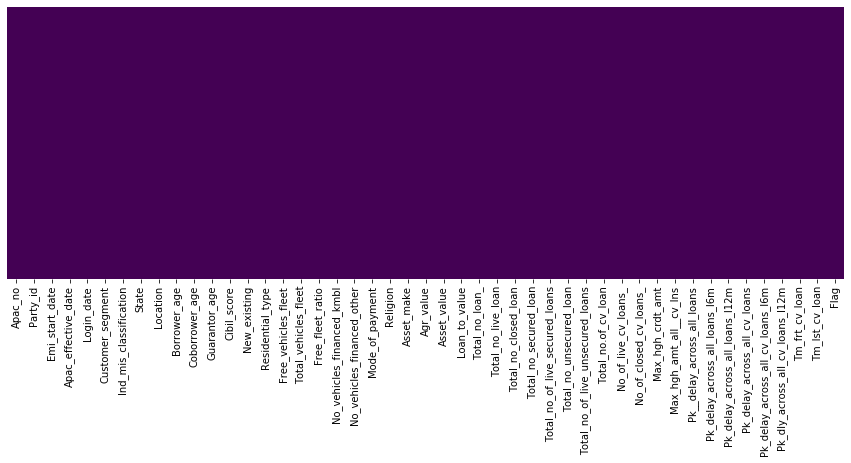

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [16]:
data.reset_index()

,index,Apac_no,Party_id,Emi_start_date,Apac_effective_date,Login_date,Customer_segment,Ind_mis_classification,State,Location,...,Max_hgh_amt_all__cv_lns,Pk__delay_across_all_loans,Pk_delay_across_all_loans_l6m,Pk_delay_across_all_loans_l12m,Pk_delay_across_all_cv_loans,Pk_delay_across_all_cv_loans_l6m,Pk_dly_across_all_cv_loans_l12m,Tm_frt_cv_loan,Tm_lst_cv_loan,Flag
0,0,LCV371157,184284120,20-Jan-16,23-Dec-15,21-Dec-15,RETAIL2,REAL ESTATE RENTING AND BUSINESS ACTIVITIES,TAMIL NADU,KELAMBAKKA,...,1500000,90,90,90,30,30,30,2410,761,0
1,1,LCV396469,59870390,05-May-16,31-Mar-16,16-Feb-16,NONSRTO,TRANSPORT STORAGE AND COMMUNICATIONS,PUNJAB,LUDHIANA,...,0,30,0,0,0,0,0,0,0,0
2,2,LCV469970,49019656,10-Sep-16,12-Aug-16,10-Aug-16,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,TAMIL NADU,SALEM,...,751000,30,0,30,30,0,30,1502,1502,0
3,3,LCV456630,42998157,05-Aug-16,05-Jul-16,21-Jun-16,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,RAJASTHAN,JAIPUR,...,200000,32,30,30,0,0,0,1252,1252,0
4,4,LCV322140,9126225,10-Oct-15,04-Sep-15,10-Aug-15,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,GUJARAT,AHMD_CHDR,...,990000,30,30,30,30,30,30,1519,242,0
5,5,LCV360430,171915855,15-Dec-15,19-Nov-15,10-Nov-15,NONSRTO,WHOLESALE AND RETAIL TRADE REPAIR OF MOTOR VE...,PUNJAB,LUDHIANA,...,0,30,30,30,0,0,0,0,0,0
6,6,LCV287301,93527188,15-Jun-15,27-May-15,25-Apr-15,NONSRTO,WHOLESALE AND RETAIL TRADE REPAIR OF MOTOR VE...,DELHI,GHAZIABAD,...,256000,30,30,30,30,30,30,1355,1355,0
7,7,LCV504800,200215129,20-Nov-16,26-Oct-16,10-Oct-16,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,HARYANA,ROHTAK,...,0,30,30,30,0,0,0,0,0,0
8,8,LCV418311,99055014,20-May-16,20-May-16,11-Apr-16,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,TAMIL NADU,TRICHY,...,600000,148,87,148,148,87,148,2173,12,0
9,9,LCV287298,33975578,10-Jun-15,05-May-15,28-Apr-15,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,DELHI,DELHI,...,604000,32,30,30,32,30,30,855,855,0


Now the data is free from all null values

### Binning the Numerical Variables

Information Value and Weight of Evidence (WoE) are the two most used concepts for variable selection and variable transformation respectively. 
Information Value helps quantify the predictive power of a variable in separating the Good Customers from the Bad Customers.

#### IV

Information Value gives a measure of how variable X is good in distinguishing between a binary response (e.g. “good” versus “bad”) in some target variable Y. Low Information Value of a variable X means that it may not classify the target variable on a sufficient level and should be removed as an explanatory variable.

Since Information value gives us the importance of a variable it is a very important tool that can be used for variable reduction i.e. we can remove those variable form our analysis which have a very low IV score. For example- variables where IV < 0.02 (2 percent) can be removed.

#### WoE

WoE is calculated by taking the natural logarithm (log to base e) of the ratio of %Good by %Bad. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

A positive WoE means that %Good Customers> %Bad Customers, and vice-versa when the WoE is negative. 

Weight of Evidence (WOE) helps to transform a continuous independent variable into a set of groups or bins

#### Terms used in the further analysis

1. GoodProp - Stands for Good Proportion. It is the ratio of the number of good customer in a category(bin) to the total number of good customers.(Expressed as percentage)
2. BadProp - Stands for Bad Proportion. It is the ratio of the number of bad customer in a category(bin) to the total number of bad customers.(Expressed as percentage)
3. BadRate - It is the percentage of number of bad customers out of the total customers in that particular bin.
4. PopProp - Refers to the percentage of the total number of customers in that bin to the total number of customers in the dataset.

In [17]:
codes={}
def encode(bins,bad_rate,col):
    test={}
    if bad_rate[0]>bad_rate[1]:
        n=len(bins)-1
        for name in bins:
            test[name]=n
            n=n-1
    else:
        n=0
        for name in bins:
            test[name]=n
            n=n+1
    codes[col]=test

In [18]:
def graph(x,y,column,badrate):
    Fig,ax = plt.subplots()
    # make a plot
    ax.bar(x,y,color="green")
    # set x-axis label
    ax.set_xlabel(column,fontsize=14)
    # set y-axis label
    ax.set_ylabel("Total",color="green",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(x,badrate,color="blue",marker="o")
    ax2.set_ylabel("BadRate",color="blue",fontsize=14)
    plt.show()

In [19]:
def checkBins(column,check):
    df = data.groupby([column,"Flag"]).size().unstack(fill_value=0)
    bins=df.index.tolist()
    good_sum=df[0].sum()
    bad_sum=df[1].sum()
    good_prop=[]
    bad_prop=[]
    woe=[]
    iv=[]
    total=[]
    bad_rate=[]
    pop=[]
    for i in range(len(bins)):
        good_prop.append(round(df.iloc[i,0]/good_sum*100,2))
        bad_prop.append(round(df.iloc[i,1]/bad_sum*100,2))
        woe.append(np.log(good_prop[i]/bad_prop[i]))
        iv.append(((good_prop[i]/100)-(bad_prop[i]/100))*woe[i])
        total.append(df.loc[bins[i],].sum())
        bad_rate.append(round(df.iloc[i,1]/total[i]*100,2))
        pop.append(total[i]/len(data)*100)
    if check == 1 :
        encode(bins,bad_rate,column)
    bins.append("Grand Total")
    good_prop.append(100)
    bad_prop.append(100)
    woe.append(sum(woe))
    iv.append(sum(iv)*100)
    total.append(len(data))
    bad_rate.append(bad_sum/len(data)*100)
    zero=df[0].tolist()
    one=df[1].tolist()
    zero.append(good_sum)
    one.append(bad_sum)
    pop.append(100)
    d=pd.DataFrame({"Bins":bins,"0":zero,"1":one,"Total":total,"GoodProp":good_prop,"BadProp":bad_prop,"WOE":woe,"IV":iv,"BadRate":bad_rate,"PopProp":pop})
    graph(bins[0:len(bins)-1],total[0:len(total)-1],column,bad_rate[0:len(bad_rate)-1])
    return d


In [20]:
len(data)
changed_columns=[]

# Numerical Variables

#### Borrower_age Column

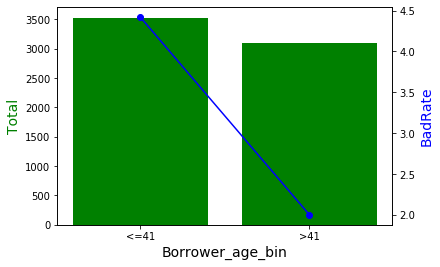

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=41,3373,156,3529,52.61,71.56,-0.307630,0.058296,4.42000,53.235782
1,>41,3038,62,3100,47.39,28.44,0.510615,0.096761,2.00000,46.764218
2,Grand Total,6411,218,6629,100.00,100.00,0.202985,15.505737,3.28858,100.000000


In [21]:
data.loc[data.Borrower_age<=41,"Borrower_age_bin"] = "<=41"
data.loc[data.Borrower_age>41,"Borrower_age_bin"] = ">41"
checkBins("Borrower_age_bin",0)

In [22]:
changed_columns.append("Borrower_age")

#### Coborrower_age Column

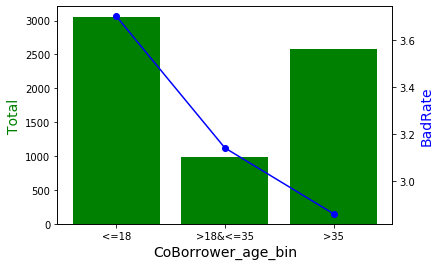

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=18,2945,113,3058,45.94,51.83,-0.120633,0.007105,3.70000,46.130638
1,>18&<=35,956,31,987,14.91,14.22,0.047383,0.000327,3.14000,14.889124
2,>35,2510,74,2584,39.15,33.94,0.142806,0.007440,2.86000,38.980238
3,Grand Total,6411,218,6629,100.00,100.00,0.069556,1.487242,3.28858,100.000000


In [23]:
data.loc[data.Coborrower_age<=18,"CoBorrower_age_bin"] = "<=18"
data.loc[(data.Coborrower_age>18)&(data.Coborrower_age<=35),"CoBorrower_age_bin"] = ">18&<=35"
data.loc[data.Coborrower_age>35,"CoBorrower_age_bin"] = ">35"
checkBins("CoBorrower_age_bin",0)

In [24]:
changed_columns.append("Coborrower_age")

#### Guarantor_age column

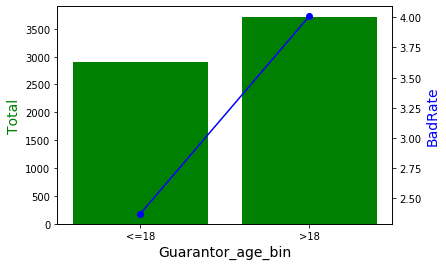

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=18,2840,69,2909,44.3,31.65,0.336247,0.042535,2.37000,43.882939
1,>18,3571,149,3720,55.7,68.35,-0.204661,0.025890,4.01000,56.117061
2,Grand Total,6411,218,6629,100.0,100.00,0.131585,6.842486,3.28858,100.000000


In [25]:
data.loc[data.Guarantor_age<=18,"Guarantor_age_bin"] = "<=18"
data.loc[data.Guarantor_age>18,"Guarantor_age_bin"] = ">18"
checkBins("Guarantor_age_bin",0)

In [26]:
changed_columns.append("Guarantor_age")

#### Cibil_score

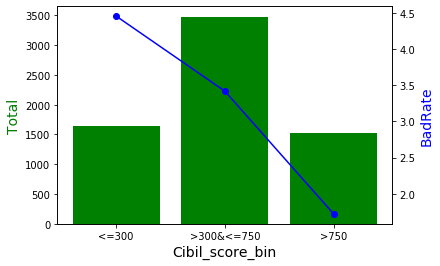

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=300,1562,73,1635,24.36,33.49,-0.318304,0.029061,4.46000,24.664354
1,>300&<=750,3360,119,3479,52.41,54.59,-0.040753,0.000888,3.42000,52.481521
2,>750,1489,26,1515,23.23,11.93,0.666388,0.075302,1.72000,22.854126
3,Grand Total,6411,218,6629,100.00,100.00,0.307331,10.525150,3.28858,100.000000


In [27]:
data.loc[data.Cibil_score<=300,"Cibil_score_bin"] = "<=300"
data.loc[(data.Cibil_score>300)&(data.Cibil_score<=750),"Cibil_score_bin"] = ">300&<=750"
data.loc[data.Cibil_score>750,"Cibil_score_bin"] = ">750"
checkBins("Cibil_score_bin",0)

In [28]:
changed_columns.append("Cibil_score")

#### Free_vehicles_fleet column

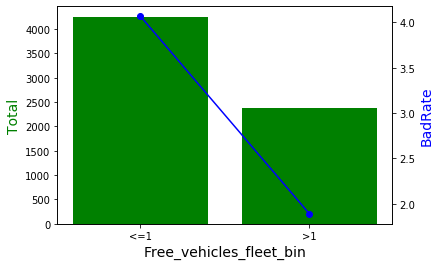

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,4081,173,4254,63.66,79.36,-0.220438,0.034609,4.07000,64.172575
1,>1,2330,45,2375,36.34,20.64,0.565688,0.088813,1.89000,35.827425
2,Grand Total,6411,218,6629,100.00,100.00,0.345250,12.342181,3.28858,100.000000


In [29]:
data.loc[data.Free_vehicles_fleet<=1,"Free_vehicles_fleet_bin"] = "<=1"
data.loc[data.Free_vehicles_fleet>1,"Free_vehicles_fleet_bin"] = ">1"
checkBins("Free_vehicles_fleet_bin",0)

In [30]:
changed_columns.append("Free_vehicles_fleet")

#### Total_vehicles_fleet column

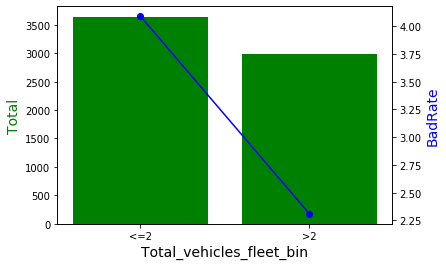

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=2,3498,149,3647,54.56,68.35,-0.225341,0.031074,4.09000,55.015839
1,>2,2913,69,2982,45.44,31.65,0.361655,0.049872,2.31000,44.984161
2,Grand Total,6411,218,6629,100.00,100.00,0.136314,8.094663,3.28858,100.000000


In [31]:
data.loc[data.Total_vehicles_fleet<=2,"Total_vehicles_fleet_bin"] = "<=2"
data.loc[data.Total_vehicles_fleet>2,"Total_vehicles_fleet_bin"] = ">2"
checkBins("Total_vehicles_fleet_bin",0)

In [32]:
changed_columns.append("Total_vehicles_fleet")

#### Free_fleet_ratio column

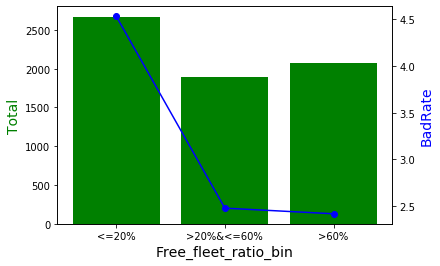

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=20%,2549,121,2670,39.76,55.50,-0.333522,0.052496,4.53000,40.277568
1,>20%&<=60%,1847,47,1894,28.81,21.56,0.289883,0.021017,2.48000,28.571429
2,>60%,2015,50,2065,31.43,22.94,0.314881,0.026733,2.42000,31.151003
3,Grand Total,6411,218,6629,100.00,100.00,0.271242,10.024618,3.28858,100.000000


In [33]:
data.loc[data.Free_fleet_ratio<=10,"Free_fleet_ratio_bin"] = "<=20%"
data.loc[(data.Free_fleet_ratio>10)&(data.Free_fleet_ratio<=60),"Free_fleet_ratio_bin"] = ">20%&<=60%"
data.loc[data.Free_fleet_ratio>60,"Free_fleet_ratio_bin"] = ">60%"
checkBins("Free_fleet_ratio_bin",0)

In [34]:
changed_columns.append("Free_fleet_ratio")

#### No_vehicles_financed_kmbl column *

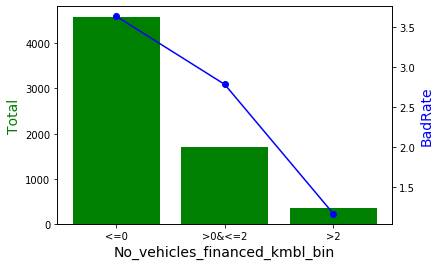

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=0,4428,167,4595,69.07,76.61,-0.103607,0.007812,3.63000,69.316639
1,>0&<=2,1646,47,1693,25.67,21.56,0.174483,0.007171,2.78000,25.539297
2,>2,337,4,341,5.26,1.83,1.055815,0.036214,1.17000,5.144064
3,Grand Total,6411,218,6629,100.00,100.00,1.126691,5.119770,3.28858,100.000000


In [35]:
data.loc[data.No_vehicles_financed_kmbl<=0,"No_vehicles_financed_kmbl_bin"] = "<=0"
data.loc[(data.No_vehicles_financed_kmbl>0)&(data.No_vehicles_financed_kmbl<=2),"No_vehicles_financed_kmbl_bin"] = ">0&<=2"
data.loc[data.No_vehicles_financed_kmbl>2,"No_vehicles_financed_kmbl_bin"] = ">2"
checkBins("No_vehicles_financed_kmbl_bin",0)

In [36]:
changed_columns.append("No_vehicles_financed_kmbl")

#### No_vehicles_financed_other column *

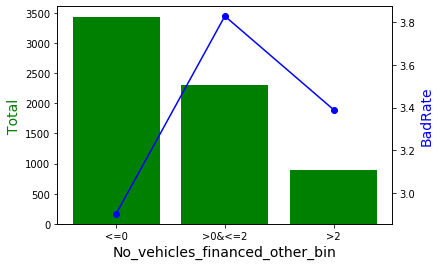

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=0,3343,100,3443,52.14,45.87,0.128121,0.008033,2.90000,51.938452
1,>0&<=2,2212,88,2300,34.50,40.37,-0.157128,0.009223,3.83000,34.696033
2,>2,856,30,886,13.35,13.76,-0.030249,0.000124,3.39000,13.365515
3,Grand Total,6411,218,6629,100.00,100.00,-0.059256,1.738061,3.28858,100.000000


In [37]:
data.loc[data.No_vehicles_financed_other<=0,"No_vehicles_financed_other_bin"] = "<=0"
data.loc[(data.No_vehicles_financed_other>0)&(data.No_vehicles_financed_other<=2),"No_vehicles_financed_other_bin"] = ">0&<=2"
data.loc[data.No_vehicles_financed_other>2,"No_vehicles_financed_other_bin"] = ">2"
checkBins("No_vehicles_financed_other_bin",0)

#### Agr_value column

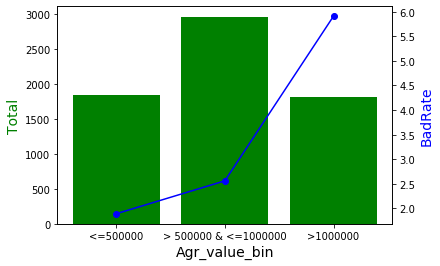

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=500000,1816,35,1851,28.33,16.06,0.567590,0.069643,1.89000,27.922764
1,> 500000 & <=1000000,2892,76,2968,45.11,34.86,0.257764,0.026421,2.56000,44.772967
2,>1000000,1703,107,1810,26.56,49.08,-0.614045,0.138283,5.91000,27.304269
3,Grand Total,6411,218,6629,100.00,100.00,0.211308,23.434705,3.28858,100.000000


In [38]:
data.loc[data.Agr_value<=500000,"Agr_value_bin"] = "<=500000"
data.loc[(data.Agr_value>500000)&(data.Agr_value<=1000000),"Agr_value_bin"] = "> 500000 & <=1000000"
data.loc[data.Agr_value>1000000,"Agr_value_bin"] = ">1000000"
checkBins("Agr_value_bin",0)

In [39]:
changed_columns.append("Agr_value")

#### Asset_value column

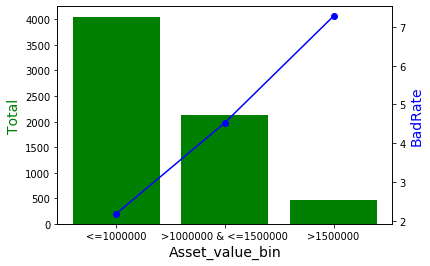

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1000000,3967,89,4056,61.88,40.83,0.415780,0.087522,2.19000,61.185699
1,>1000000 & <=1500000,2023,96,2119,31.56,44.04,-0.333208,0.041584,4.53000,31.965606
2,>1500000,421,33,454,6.57,15.14,-0.834826,0.071545,7.27000,6.848695
3,Grand Total,6411,218,6629,100.00,100.00,-0.752254,20.065063,3.28858,100.000000


In [40]:
data.loc[data.Asset_value<=1000000,"Asset_value_bin"] = "<=1000000"
data.loc[(data.Asset_value>1000000)&(data.Asset_value<=1500000),"Asset_value_bin"] = ">1000000 & <=1500000"
data.loc[data.Asset_value>1500000,"Asset_value_bin"] = ">1500000"
checkBins("Asset_value_bin",0)

In [41]:
changed_columns.append("Asset_value")

#### Loan_to_value column

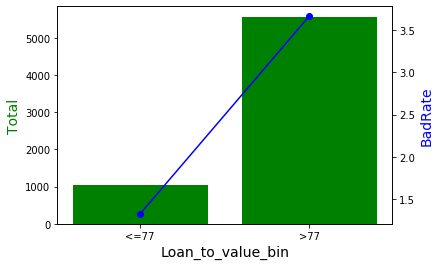

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=77,1040,14,1054,16.22,6.42,0.926827,0.090829,1.33000,15.899834
1,>77,5371,204,5575,83.78,93.58,-0.110622,0.010841,3.66000,84.100166
2,Grand Total,6411,218,6629,100.00,100.00,0.816205,10.167003,3.28858,100.000000


In [42]:
data.loc[data.Loan_to_value<=77,"Loan_to_value_bin"] = "<=77"
data.loc[data.Loan_to_value>77,"Loan_to_value_bin"] = ">77"
checkBins("Loan_to_value_bin",0)

In [43]:
changed_columns.append("Loan_to_value")

#### Total_no_loan column 

In [44]:
data.rename(columns = {'Total_no_loan_':'Total_no_loan'}, inplace = True)

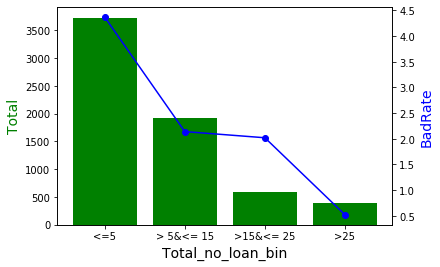

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=5,3570,163,3733,55.69,74.77,-0.294616,0.056213,4.37000,56.313169
1,> 5&<= 15,1876,41,1917,29.26,18.81,0.441833,0.046172,2.14000,28.918389
2,>15&<= 25,583,12,595,9.09,5.50,0.502427,0.018037,2.02000,8.975713
3,>25,382,2,384,5.96,0.92,1.868452,0.094170,0.52000,5.792729
4,Grand Total,6411,218,6629,100.00,100.00,2.518096,21.459139,3.28858,100.000000


In [45]:
data.loc[data.Total_no_loan<=5,"Total_no_loan_bin"] = "<=5"
data.loc[(data.Total_no_loan>5)&(data.Total_no_loan<=15),"Total_no_loan_bin"] = "> 5&<= 15"
data.loc[(data.Total_no_loan>15)&(data.Total_no_loan<=25),"Total_no_loan_bin"] = ">15&<= 25"
data.loc[data.Total_no_loan>25,"Total_no_loan_bin"] = ">25"
checkBins("Total_no_loan_bin",0)

In [46]:
changed_columns.append("Total_no_loan")

#### Total_no_live_loan column*

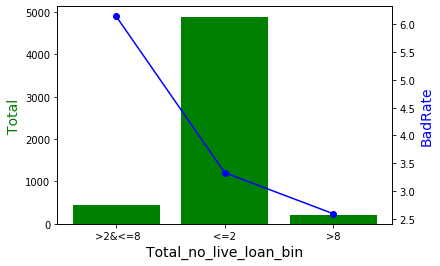

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,>2&<=8,412,27,439,7.73,13.85,-0.583176,0.035690,6.15000,6.622417
1,<=2,4730,163,4893,88.74,83.59,0.059787,0.003079,3.33000,73.812038
2,>8,188,5,193,3.53,2.56,0.321291,0.003117,2.59000,2.911450
3,Grand Total,5330,195,6629,100.00,100.00,-0.202099,4.188594,2.94162,100.000000


In [47]:
data.loc[data.Total_no_live_loan<=2,"Total_no_live_loan_bin"] = "<=2"
data.loc[(data.Total_no_live_loan>2)&(data.Total_no_loan<=8),"Total_no_live_loan_bin"] = " >2&<=8"
data.loc[data.Total_no_live_loan>8,"Total_no_live_loan_bin"] = ">8"
checkBins("Total_no_live_loan_bin",0)

#### Total_no_closed_loan column *


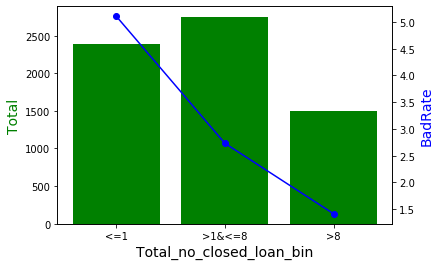

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,2264,122,2386,35.31,55.96,-0.460471,0.095087,5.11000,35.993362
1,>1&<=8,2677,75,2752,41.76,34.40,0.193882,0.014270,2.73000,41.514557
2,>8,1470,21,1491,22.93,9.63,0.867563,0.115386,1.41000,22.492080
3,Grand Total,6411,218,6629,100.00,100.00,0.600974,22.474285,3.28858,100.000000


In [48]:
data.loc[data.Total_no_closed_loan<=1,"Total_no_closed_loan_bin"] = "<=1"
data.loc[(data.Total_no_closed_loan>1)&(data.Total_no_closed_loan<=8),"Total_no_closed_loan_bin"] = ">1&<=8"
data.loc[data.Total_no_closed_loan>8,"Total_no_closed_loan_bin"] = ">8"
checkBins("Total_no_closed_loan_bin",0)

In [49]:
changed_columns.append("Total_no_closed_loan")

#### Total_no_secured_loan column

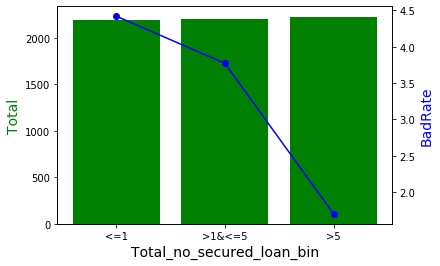

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,2098,97,2195,32.73,44.50,-0.307197,0.036157,4.42000,33.112083
1,>1&<=5,2121,83,2204,33.08,38.07,-0.140498,0.007011,3.77000,33.247850
2,>5,2192,38,2230,34.19,17.43,0.673740,0.112919,1.70000,33.640066
3,Grand Total,6411,218,6629,100.00,100.00,0.226046,15.608682,3.28858,100.000000


In [50]:
data.loc[data.Total_no_secured_loan<=1,"Total_no_secured_loan_bin"] = "<=1"
data.loc[(data.Total_no_secured_loan>1)&(data.Total_no_secured_loan<=5),"Total_no_secured_loan_bin"] = ">1&<=5"
data.loc[data.Total_no_secured_loan>5,"Total_no_secured_loan_bin"] = ">5"
checkBins("Total_no_secured_loan_bin",0)

In [51]:
changed_columns.append("Total_no_secured_loan")

#### Total_no_of_live_secured_loans column *

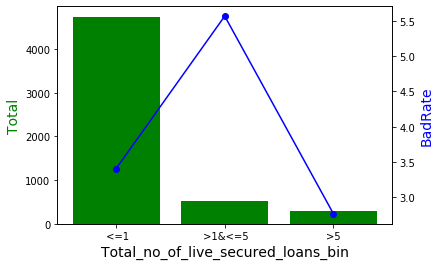

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,4581,161,4742,85.55,81.31,0.050832,0.002155,3.400000,71.534168
1,>1&<=5,492,29,521,9.19,14.65,-0.466324,0.025461,5.570000,7.859406
2,>5,282,8,290,5.27,4.04,0.265786,0.003269,2.760000,4.374717
3,Grand Total,5355,198,6629,100.00,100.00,-0.149707,3.088575,2.986876,100.000000


In [52]:
data.loc[data.Total_no_of_live_secured_loans<=1,"Total_no_of_live_secured_loans_bin"] = " <=1"
data.loc[(data.Total_no_of_live_secured_loans>1)&(data.Total_no_secured_loan<=5),"Total_no_of_live_secured_loans_bin"] = " >1&<=5"
data.loc[data.Total_no_of_live_secured_loans>5,"Total_no_of_live_secured_loans_bin"] = ">5"
checkBins("Total_no_of_live_secured_loans_bin",0)

#### Total_no_unsecured_loan column 

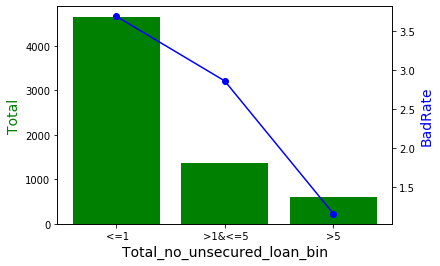

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,4487,172,4659,69.99,78.90,-0.119829,0.010677,3.69000,70.282094
1,>1&<=5,1325,39,1364,20.67,17.89,0.144441,0.004015,2.86000,20.576256
2,>5,599,7,606,9.34,3.21,1.068035,0.065471,1.16000,9.141650
3,Grand Total,6411,218,6629,100.00,100.00,1.092648,8.016279,3.28858,100.000000


In [53]:
data.loc[data.Total_no_unsecured_loan<=1,"Total_no_unsecured_loan_bin"] = " <=1"
data.loc[(data.Total_no_unsecured_loan>1)&(data.Total_no_unsecured_loan<=5),"Total_no_unsecured_loan_bin"] = " >1&<=5"
data.loc[data.Total_no_unsecured_loan>5,"Total_no_unsecured_loan_bin"] = ">5"
checkBins("Total_no_unsecured_loan_bin",0)

In [54]:
changed_columns.append("Total_no_unsecured_loan")

#### Total_no_of_live_unsecured_loans column *

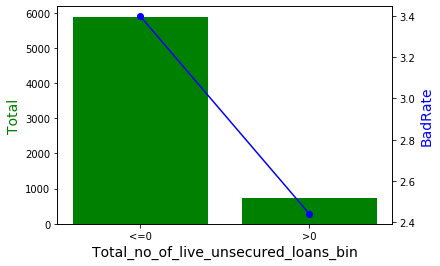

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=0,5690,200,5890,88.75,91.74,-0.033135,0.000991,3.40000,88.852014
1,>0,721,18,739,11.25,8.26,0.308944,0.009237,2.44000,11.147986
2,Grand Total,6411,218,6629,100.00,100.00,0.275808,1.022815,3.28858,100.000000


In [55]:
data.loc[data.Total_no_of_live_unsecured_loans<2,"Total_no_of_live_unsecured_loans_bin"] = "<=0"
data.loc[data.Total_no_of_live_unsecured_loans>=2,"Total_no_of_live_unsecured_loans_bin"] = ">0"
checkBins("Total_no_of_live_unsecured_loans_bin",0)

#### Total_no.of_cv_loan column

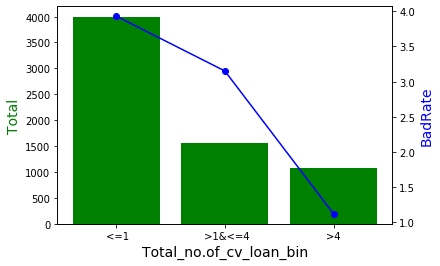

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,3842,157,3999,59.93,72.02,-0.183767,0.022217,3.93000,60.325841
1,>1&<=4,1505,49,1554,23.48,22.48,0.043523,0.000435,3.15000,23.442450
2,>4,1064,12,1076,16.60,5.50,1.104655,0.122617,1.12000,16.231709
3,Grand Total,6411,218,6629,100.00,100.00,0.964411,14.526928,3.28858,100.000000


In [56]:
data.loc[data['Total_no.of_cv_loan']<=1,"Total_no.of_cv_loan_bin"] = " <=1"
data.loc[(data['Total_no.of_cv_loan']>1)&(data['Total_no.of_cv_loan']<=4),"Total_no.of_cv_loan_bin"] = " >1&<=4"
data.loc[data['Total_no.of_cv_loan']>4,"Total_no.of_cv_loan_bin"] = ">4"
checkBins("Total_no.of_cv_loan_bin",0)

In [57]:
changed_columns.append("Total_no.of_cv_loan")

#### No_of_live_cv_loans column *

In [58]:
data.rename(columns = {'No_of_live_cv_loans_':'No_of_live_cv_loans'}, inplace = True)

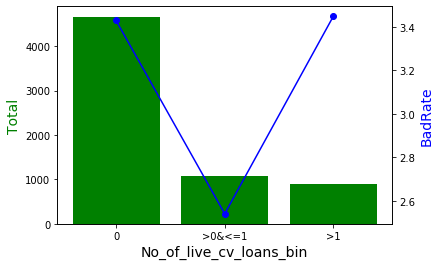

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,0,4506,160,4666,70.29,73.39,-0.043158,0.001338,3.43000,70.387690
1,>0&<=1,1038,27,1065,16.19,12.39,0.267504,0.010165,2.54000,16.065772
2,>1,867,31,898,13.52,14.22,-0.050479,0.000353,3.45000,13.546538
3,Grand Total,6411,218,6629,100.00,100.00,0.173867,1.185641,3.28858,100.000000


In [59]:
data.loc[data.No_of_live_cv_loans<=0,"No_of_live_cv_loans_bin"] = "0"
data.loc[(data.No_of_live_cv_loans>0)&(data.No_of_live_cv_loans<=1),"No_of_live_cv_loans_bin"] = ">0&<=1"
data.loc[data.No_of_live_cv_loans>1,"No_of_live_cv_loans_bin"] = ">1"
checkBins("No_of_live_cv_loans_bin",0)

#### No_of_closed_cv_loans column

In [60]:
data.rename(columns = {'No_of_closed_cv_loans_':'No_of_closed_cv_loans'}, inplace = True)

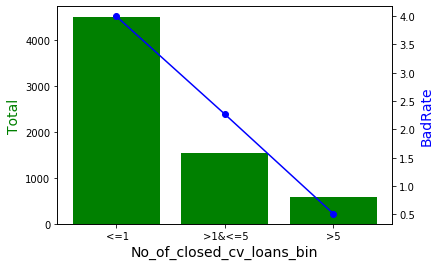

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=1,4320,180,4500,67.38,82.57,-0.203298,0.030881,4.00000,67.883542
1,>1&<=5,1505,35,1540,23.48,16.06,0.379817,0.028182,2.27000,23.231257
2,>5,586,3,589,9.14,1.38,1.890577,0.146709,0.51000,8.885201
3,Grand Total,6411,218,6629,100.00,100.00,2.067096,20.577220,3.28858,100.000000


In [61]:
data.loc[data.No_of_closed_cv_loans<=1,"No_of_closed_cv_loans_bin"] = " <=1"
data.loc[(data.No_of_closed_cv_loans>1)&(data.No_of_closed_cv_loans<=5),"No_of_closed_cv_loans_bin"] = " >1&<=5"
data.loc[data.No_of_closed_cv_loans>5,"No_of_closed_cv_loans_bin"] = ">5"
checkBins("No_of_closed_cv_loans_bin",0)

In [62]:
changed_columns.append("No_of_closed_cv_loans")

#### Max_hgh_crdt_amt column

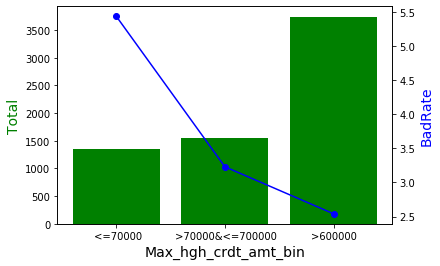

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=70000,1268,73,1341,19.78,33.49,-0.526576,0.072194,5.44000,20.229296
1,>70000&<=700000,1496,50,1546,23.33,22.94,0.016858,0.000066,3.23000,23.321768
2,>600000,3647,95,3742,56.89,43.58,0.266521,0.035474,2.54000,56.448936
3,Grand Total,6411,218,6629,100.00,100.00,-0.243196,10.773323,3.28858,100.000000


In [63]:
data.loc[data.Max_hgh_crdt_amt<=70000,"Max_hgh_crdt_amt_bin"] = " <=70000"
data.loc[(data.Max_hgh_crdt_amt>70000)&(data.Max_hgh_crdt_amt<=700000),"Max_hgh_crdt_amt_bin"] = " >70000&<=700000"
data.loc[data.Max_hgh_crdt_amt>600000,"Max_hgh_crdt_amt_bin"] = ">600000"
checkBins("Max_hgh_crdt_amt_bin",0)

In [64]:
changed_columns.append("Max_hgh_crdt_amt")

#### Max_hgh_amt_all__cv_lns column

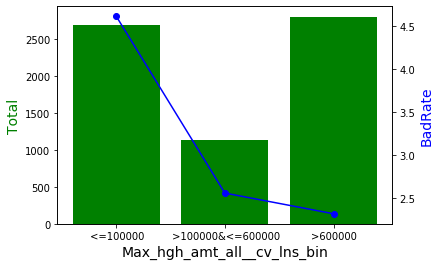

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=100000,2565,124,2689,40.01,56.88,-0.351814,0.059351,4.61000,40.564188
1,>100000&<=600000,1105,29,1134,17.24,13.30,0.259468,0.010223,2.56000,17.106653
2,>600000,2741,65,2806,42.75,29.82,0.360190,0.046573,2.32000,42.329160
3,Grand Total,6411,218,6629,100.00,100.00,0.267844,11.614668,3.28858,100.000000


In [65]:
data.loc[data.Max_hgh_amt_all__cv_lns<=100000,"Max_hgh_amt_all__cv_lns_bin"] = " <=100000"
data.loc[(data.Max_hgh_amt_all__cv_lns>100000)&(data.Max_hgh_amt_all__cv_lns<=600000),"Max_hgh_amt_all__cv_lns_bin"] = " >100000&<=600000"
data.loc[data.Max_hgh_amt_all__cv_lns>600000,"Max_hgh_amt_all__cv_lns_bin"] = ">600000"
checkBins("Max_hgh_amt_all__cv_lns_bin",0)

In [66]:
changed_columns.append("Max_hgh_amt_all__cv_lns")

#### Pk__delay_across_all_loans column

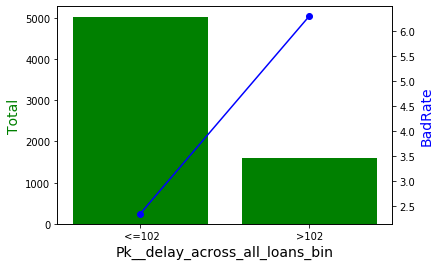

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=102,4922,118,5040,76.77,54.13,0.349425,0.079110,2.34000,76.029567
1,>102,1489,100,1589,23.23,45.87,-0.680367,0.154035,6.29000,23.970433
2,Grand Total,6411,218,6629,100.00,100.00,-0.330941,23.314494,3.28858,100.000000


In [67]:
data.loc[data.Pk__delay_across_all_loans<=102,"Pk__delay_across_all_loans_bin"] = " <=102"
data.loc[data.Pk__delay_across_all_loans>102,"Pk__delay_across_all_loans_bin"] = ">102"
checkBins("Pk__delay_across_all_loans_bin",0)

In [68]:
changed_columns.append("Pk__delay_across_all_loans")

#### Pk_delay_across_all_loans_l6m column

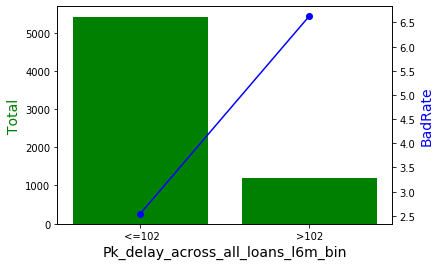

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=102,5285,138,5423,82.44,63.3,0.264185,0.050565,2.54000,81.807211
1,>102,1126,80,1206,17.56,36.7,-0.737153,0.141091,6.63000,18.192789
2,Grand Total,6411,218,6629,100.00,100.0,-0.472968,19.165621,3.28858,100.000000


In [69]:
data.loc[data.Pk_delay_across_all_loans_l6m<=102,"Pk_delay_across_all_loans_l6m_bin"] = " <=102"
data.loc[data.Pk_delay_across_all_loans_l6m>102,"Pk_delay_across_all_loans_l6m_bin"] = ">102"
checkBins("Pk_delay_across_all_loans_l6m_bin",0)

In [70]:
changed_columns.append("Pk_delay_across_all_loans_l6m")

#### Pk_delay_across_all_loans_l12m column

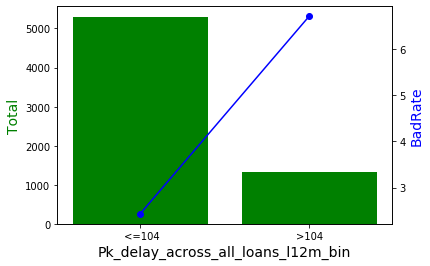

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=104,5176,129,5305,80.74,59.17,0.310819,0.067044,2.43000,80.027153
1,>104,1235,89,1324,19.26,40.83,-0.751387,0.162074,6.72000,19.972847
2,Grand Total,6411,218,6629,100.00,100.00,-0.440567,22.911787,3.28858,100.000000


In [71]:
data.loc[data.Pk_delay_across_all_loans_l12m<=104,"Pk_delay_across_all_loans_l12m_bin"] = " <=104"
data.loc[data.Pk_delay_across_all_loans_l12m>104,"Pk_delay_across_all_loans_l12m_bin"] = ">104"
checkBins("Pk_delay_across_all_loans_l12m_bin",0)

In [72]:
changed_columns.append("Pk_delay_across_all_loans_l12m")

#### Pk_delay_across_all_cv_loans column

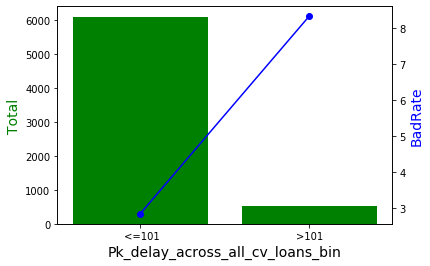

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=101,5927,174,6101,92.45,79.82,0.146894,0.018553,2.85000,92.034998
1,>101,484,44,528,7.55,20.18,-0.983144,0.124171,8.33000,7.965002
2,Grand Total,6411,218,6629,100.00,100.00,-0.836251,14.272384,3.28858,100.000000


In [73]:
data.loc[data.Pk_delay_across_all_cv_loans<=101,"Pk_delay_across_all_cv_loans_bin"] = " <=101"
data.loc[data.Pk_delay_across_all_cv_loans>101,"Pk_delay_across_all_cv_loans_bin"] = ">101"
checkBins("Pk_delay_across_all_cv_loans_bin",0)

In [74]:
changed_columns.append("Pk_delay_across_all_cv_loans")

#### Pk_delay_across_all_cv_loans_l6m column

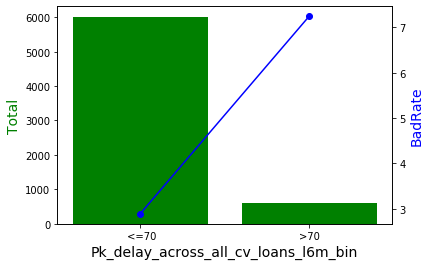

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=70,5848,174,6022,91.22,79.82,0.133500,0.015219,2.89000,90.843264
1,>70,563,44,607,8.78,20.18,-0.832216,0.094873,7.25000,9.156736
2,Grand Total,6411,218,6629,100.00,100.00,-0.698716,11.009159,3.28858,100.000000


In [75]:
data.loc[data.Pk_delay_across_all_cv_loans_l6m<=70,"Pk_delay_across_all_cv_loans_l6m_bin"] = " <=70"
data.loc[data.Pk_delay_across_all_cv_loans_l6m>70,"Pk_delay_across_all_cv_loans_l6m_bin"] = ">70"
checkBins("Pk_delay_across_all_cv_loans_l6m_bin",0)

In [76]:
changed_columns.append("Pk_delay_across_all_cv_loans_l6m")

#### Pk_dly_across_all_cv_loans_l12m column

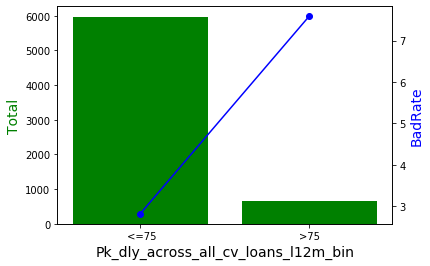

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=75,5802,168,5970,90.5,77.06,0.160766,0.021607,2.81000,90.058832
1,>75,609,50,659,9.5,22.94,-0.881590,0.118486,7.59000,9.941168
2,Grand Total,6411,218,6629,100.0,100.00,-0.720825,14.009262,3.28858,100.000000


In [77]:
data.loc[data.Pk_dly_across_all_cv_loans_l12m<=75,"Pk_dly_across_all_cv_loans_l12m_bin"] = " <=75"
data.loc[data.Pk_dly_across_all_cv_loans_l12m>75,"Pk_dly_across_all_cv_loans_l12m_bin"] = ">75"
checkBins("Pk_dly_across_all_cv_loans_l12m_bin",0)

In [78]:
changed_columns.append("Pk_dly_across_all_cv_loans_l12m")

#### Tm_frt_cv_loan column

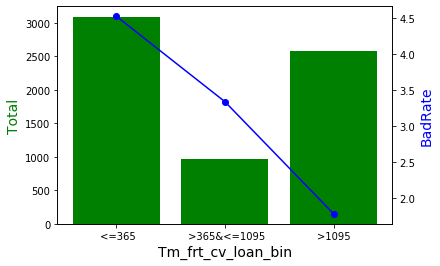

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=365,2950,140,3090,46.01,64.22,-0.333456,0.060722,4.53000,46.613366
1,>365&<=1095,926,32,958,14.44,14.68,-0.016484,0.000040,3.34000,14.451652
2,>1095,2535,46,2581,39.54,21.10,0.628040,0.115811,1.78000,38.934983
3,Grand Total,6411,218,6629,100.00,100.00,0.278100,17.657242,3.28858,100.000000


In [79]:
data.loc[data.Tm_frt_cv_loan<=365,"Tm_frt_cv_loan_bin"] = " <=365"
data.loc[(data.Tm_frt_cv_loan>365)&(data.Tm_frt_cv_loan<=1095),"Tm_frt_cv_loan_bin"] = " >365&<=1095"
data.loc[data.Tm_frt_cv_loan>1095,"Tm_frt_cv_loan_bin"] = ">1095"
checkBins("Tm_frt_cv_loan_bin",0)

In [80]:
changed_columns.append("Tm_frt_cv_loan")

#### Tm_lst_cv_loan column

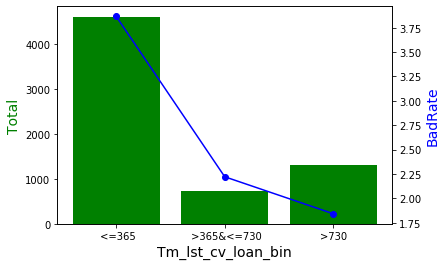

,Bins,0,1,Total,GoodProp,BadProp,WOE,IV,BadRate,PopProp
0,<=365,4427,178,4605,69.05,81.65,-0.167611,0.021119,3.87000,69.467491
1,>365&<=730,706,16,722,11.01,7.34,0.405465,0.014881,2.22000,10.891537
2,>730,1278,24,1302,19.93,11.01,0.593422,0.052933,1.84000,19.640971
3,Grand Total,6411,218,6629,100.00,100.00,0.831276,8.893281,3.28858,100.000000


In [81]:
data.loc[data.Tm_lst_cv_loan<=365,"Tm_lst_cv_loan_bin"] = " <=365"
data.loc[(data.Tm_lst_cv_loan>365)&(data.Tm_lst_cv_loan<=730),"Tm_lst_cv_loan_bin"] = " >365&<=730"
data.loc[data.Tm_lst_cv_loan>730,"Tm_lst_cv_loan_bin"] = ">730"
checkBins("Tm_lst_cv_loan_bin",0)

In [82]:
changed_columns.append("Tm_lst_cv_loan")

In [83]:
len(changed_columns)

27

In [84]:
len(data.select_dtypes(include=[np.number]).columns.tolist())

34

In [85]:
data.shape

(6629, 79)

In [86]:
data.head(10)

,Apac_no,Party_id,Emi_start_date,Apac_effective_date,Login_date,Customer_segment,Ind_mis_classification,State,Location,Borrower_age,...,Max_hgh_crdt_amt_bin,Max_hgh_amt_all__cv_lns_bin,Pk__delay_across_all_loans_bin,Pk_delay_across_all_loans_l6m_bin,Pk_delay_across_all_loans_l12m_bin,Pk_delay_across_all_cv_loans_bin,Pk_delay_across_all_cv_loans_l6m_bin,Pk_dly_across_all_cv_loans_l12m_bin,Tm_frt_cv_loan_bin,Tm_lst_cv_loan_bin
0,LCV371157,184284120,20-Jan-16,23-Dec-15,21-Dec-15,RETAIL2,REAL ESTATE RENTING AND BUSINESS ACTIVITIES,TAMIL NADU,KELAMBAKKA,52,...,>600000,>600000,<=102,<=102,<=104,<=101,<=70,<=75,>1095,>730
1,LCV396469,59870390,05-May-16,31-Mar-16,16-Feb-16,NONSRTO,TRANSPORT STORAGE AND COMMUNICATIONS,PUNJAB,LUDHIANA,64,...,>600000,<=100000,<=102,<=102,<=104,<=101,<=70,<=75,<=365,<=365
2,LCV469970,49019656,10-Sep-16,12-Aug-16,10-Aug-16,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,TAMIL NADU,SALEM,44,...,>600000,>600000,<=102,<=102,<=104,<=101,<=70,<=75,>1095,>730
3,LCV456630,42998157,05-Aug-16,05-Jul-16,21-Jun-16,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,RAJASTHAN,JAIPUR,53,...,>600000,>100000&<=600000,<=102,<=102,<=104,<=101,<=70,<=75,>1095,>730
4,LCV322140,9126225,10-Oct-15,04-Sep-15,10-Aug-15,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,GUJARAT,AHMD_CHDR,40,...,>600000,>600000,<=102,<=102,<=104,<=101,<=70,<=75,>1095,<=365
5,LCV360430,171915855,15-Dec-15,19-Nov-15,10-Nov-15,NONSRTO,WHOLESALE AND RETAIL TRADE REPAIR OF MOTOR VE...,PUNJAB,LUDHIANA,33,...,<=70000,<=100000,<=102,<=102,<=104,<=101,<=70,<=75,<=365,<=365
6,LCV287301,93527188,15-Jun-15,27-May-15,25-Apr-15,NONSRTO,WHOLESALE AND RETAIL TRADE REPAIR OF MOTOR VE...,DELHI,GHAZIABAD,54,...,>70000&<=700000,>100000&<=600000,<=102,<=102,<=104,<=101,<=70,<=75,>1095,>730
7,LCV504800,200215129,20-Nov-16,26-Oct-16,10-Oct-16,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,HARYANA,ROHTAK,31,...,>70000&<=700000,<=100000,<=102,<=102,<=104,<=101,<=70,<=75,<=365,<=365
8,LCV418311,99055014,20-May-16,20-May-16,11-Apr-16,RETAIL2,TRANSPORT STORAGE AND COMMUNICATIONS,TAMIL NADU,TRICHY,51,...,>70000&<=700000,>100000&<=600000,>102,<=102,>104,>101,>70,>75,>1095,<=365
9,LCV287298,33975578,10-Jun-15,05-May-15,28-Apr-15,RETAIL1,TRANSPORT STORAGE AND COMMUNICATIONS,DELHI,DELHI,54,...,>600000,>600000,<=102,<=102,<=104,<=101,<=70,<=75,>365&<=1095,>730


### Categorical Columns

In [87]:
data.reset_index()
data["index"]=np.nan

#### Location Column

In [88]:
g1=["DELHI", "JODHPUR", "INDORE", "AGRA", "CALCUTTA"]
g2=["JAIPUR","KELAMBAKKA","MANPADA","ROHTAK","MUMBAI","PUNE"]
g3=["AHMD_CHDR","BANGALORE","GHAZIABAD","NAGPUR","PIPLOD","RAJKOT","KARNAL","COCHIN"]

In [89]:
col=[]
for i in data.Location:
    if i in g1:
        col.append("Group1")
    elif i in g2:
        col.append("Group2")
    elif i in g3:
        col.append("Group3")
    else:
        col.append("Group4")
data.Location=col

In [90]:
data.Location.unique()

array(['Group2', 'Group4', 'Group3', 'Group1'], dtype=object)

In [91]:
data.to_csv("data.csv")

### Subsetting the data for the model

In [92]:
cols=["Location","Borrower_age_bin","Agr_value_bin","No_vehicles_financed_kmbl_bin","Max_hgh_amt_all__cv_lns_bin",
      "Total_no_closed_loan_bin", "Total_no_secured_loan_bin","No_of_closed_cv_loans_bin",
      "Pk__delay_across_all_loans_bin","Pk_delay_across_all_cv_loans_bin","Free_vehicles_fleet_bin",
      "Tm_lst_cv_loan_bin","Cibil_score_bin","Flag"]
model_data=data[cols]

In [93]:
model_data.head()

,Location,Borrower_age_bin,Agr_value_bin,No_vehicles_financed_kmbl_bin,Max_hgh_amt_all__cv_lns_bin,Total_no_closed_loan_bin,Total_no_secured_loan_bin,No_of_closed_cv_loans_bin,Pk__delay_across_all_loans_bin,Pk_delay_across_all_cv_loans_bin,Free_vehicles_fleet_bin,Tm_lst_cv_loan_bin,Cibil_score_bin,Flag
0,Group2,>41,> 500000 & <=1000000,<=0,>600000,>8,>5,>5,<=102,<=101,>1,>730,>300&<=750,0
1,Group4,>41,<=500000,<=0,<=100000,>1&<=8,>1&<=5,<=1,<=102,<=101,>1,<=365,>750,0
2,Group4,>41,<=500000,>0&<=2,>600000,<=1,<=1,<=1,<=102,<=101,<=1,>730,>750,0
3,Group2,>41,> 500000 & <=1000000,>0&<=2,>100000&<=600000,>1&<=8,>1&<=5,<=1,<=102,<=101,>1,>730,>750,0
4,Group3,<=41,> 500000 & <=1000000,>2,>600000,>8,>5,>5,<=102,<=101,>1,<=365,>300&<=750,0


### Encoding the variables

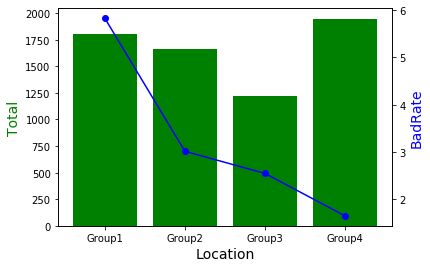

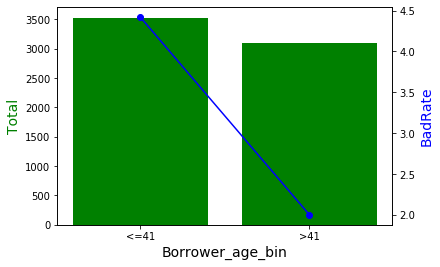

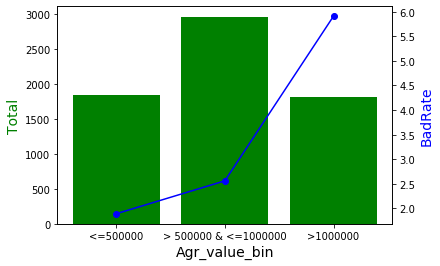

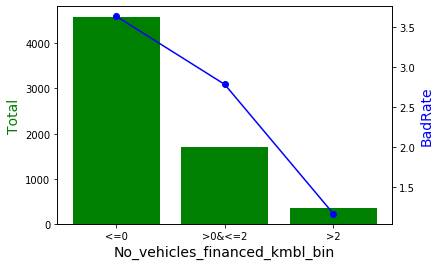

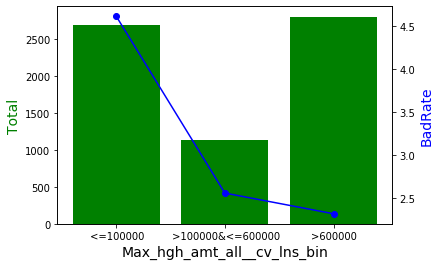

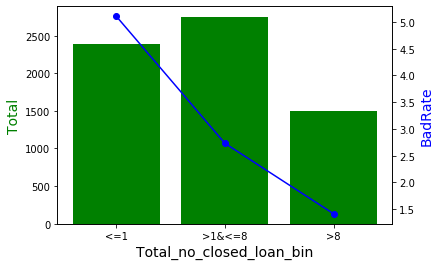

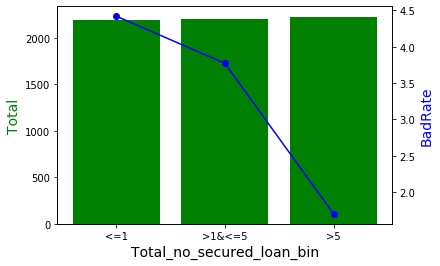

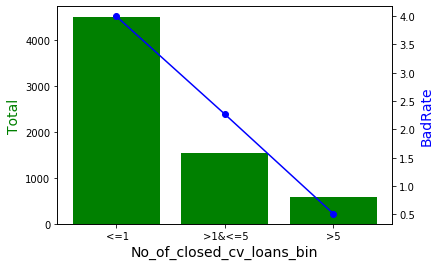

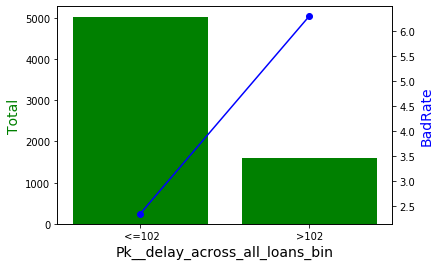

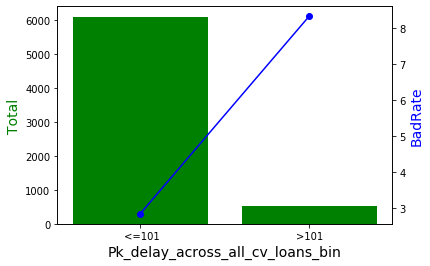

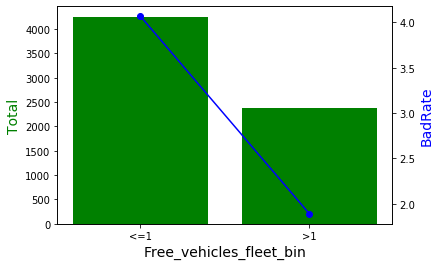

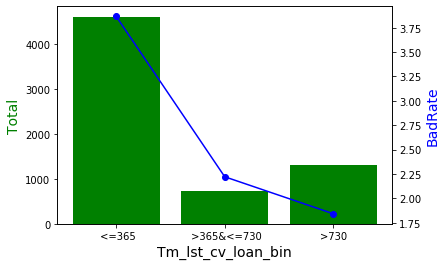

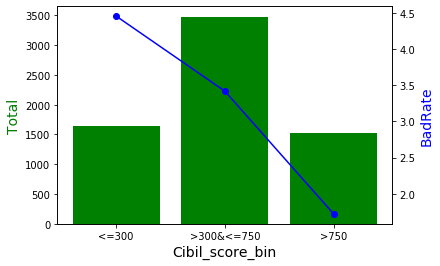

In [94]:
for col in cols[:-1]:
    checkBins(col,1)

In [95]:
codes

{'Location': {'Group1': 3, 'Group2': 2, 'Group3': 1, 'Group4': 0},
 'Borrower_age_bin': {'<=41': 1, '>41': 0},
 'Agr_value_bin': {'<=500000': 0, '> 500000 & <=1000000': 1, '>1000000': 2},
 'No_vehicles_financed_kmbl_bin': {'<=0': 2, '>0&<=2': 1, '>2': 0},
 'Max_hgh_amt_all__cv_lns_bin': {' <=100000': 2,
  ' >100000&<=600000': 1,
  '>600000': 0},
 'Total_no_closed_loan_bin': {'<=1': 2, '>1&<=8': 1, '>8': 0},
 'Total_no_secured_loan_bin': {'<=1': 2, '>1&<=5': 1, '>5': 0},
 'No_of_closed_cv_loans_bin': {' <=1': 2, ' >1&<=5': 1, '>5': 0},
 'Pk__delay_across_all_loans_bin': {' <=102': 0, '>102': 1},
 'Pk_delay_across_all_cv_loans_bin': {' <=101': 0, '>101': 1},
 'Free_vehicles_fleet_bin': {'<=1': 1, '>1': 0},
 'Tm_lst_cv_loan_bin': {' <=365': 2, ' >365&<=730': 1, '>730': 0},
 'Cibil_score_bin': {'<=300': 2, '>300&<=750': 1, '>750': 0}}

In [96]:
model_data = model_data.replace(codes)
model_data.head()

,Location,Borrower_age_bin,Agr_value_bin,No_vehicles_financed_kmbl_bin,Max_hgh_amt_all__cv_lns_bin,Total_no_closed_loan_bin,Total_no_secured_loan_bin,No_of_closed_cv_loans_bin,Pk__delay_across_all_loans_bin,Pk_delay_across_all_cv_loans_bin,Free_vehicles_fleet_bin,Tm_lst_cv_loan_bin,Cibil_score_bin,Flag
0,2,0,1,2,0,0,0,0,0,0,0,0,1,0
1,0,0,0,2,2,1,1,2,0,0,0,2,0,0
2,0,0,0,1,0,2,2,2,0,0,1,0,0,0
3,2,0,1,1,1,1,1,2,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,2,1,0


In [97]:
#model_data.to_csv("ModelData.csv",index=False)

### Model Making Process

#### Step 1 - Splitting the data into train and test sets

In [98]:
train_x = model_data.drop(["Flag"],axis=1)
train_y = model_data.Flag

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.2,random_state=132)

#### Step 2 - Passing the data to a Random Forest model to select the top 6 important features

In [99]:
np.random.seed(123)
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
rf = RandomForestClassifier(n_estimators=15,
                               criterion="gini",
                               max_depth=4,
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt")# n_estimators means number tree we want  

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=15)

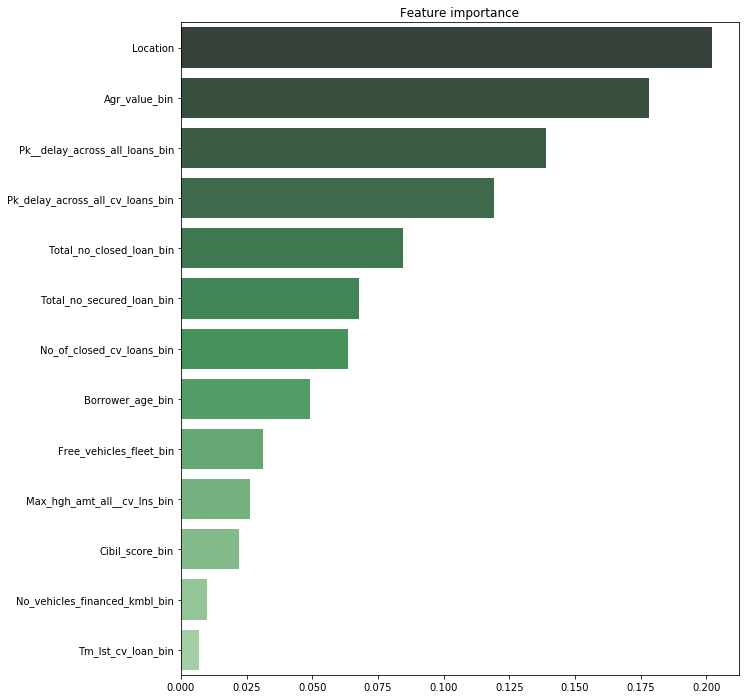

In [100]:
# Plot features importances
imp = pd.Series(data=rf.feature_importances_, index=train_x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Greens_d", orient='h')

From the above chart we select the top 6 variables based on its importance for all the further processes. 
Which are - 
    1. Location
    2. Agr_value_bin
    3. Pk__delay_across_all_loans_bin
    4. Pk_delay_across_all_cv_loans_bin
    5. Total_no_closed_loan_bin
    6. Total_no_secured_loan_bin

In [101]:
cols=["Location","Agr_value_bin","Pk__delay_across_all_loans_bin","Pk_delay_across_all_cv_loans_bin",
      "Total_no_closed_loan_bin",
      "Total_no_secured_loan_bin","Flag"]
model_data=model_data[cols]

In [102]:
model_data.head()

,Location,Agr_value_bin,Pk__delay_across_all_loans_bin,Pk_delay_across_all_cv_loans_bin,Total_no_closed_loan_bin,Total_no_secured_loan_bin,Flag
0,2,1,0,0,0,0,0
1,0,0,0,0,1,1,0
2,0,0,0,0,2,2,0
3,2,1,0,0,1,1,0
4,1,1,0,0,0,0,0


#### Step 3 - Building the Logistic Regression Model

In [103]:
train_x = model_data.drop(["Flag"],axis=1)
train_y = model_data.Flag

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.2,random_state=132)

In [104]:
statement="Flag~"
for col in cols[:-1]:
    statement=statement+"C("+col+")+"

In [105]:
statement=statement[:-1]

In [106]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model=smf.logit(statement,data=model_data).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.125430
         Iterations 9
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.133     
Dependent Variable:         Flag                     AIC:                      1686.9531 
Date:                       2021-08-11 15:46         BIC:                      1768.5436 
No. Observations:           6629                     Log-Likelihood:           -831.48   
Df Model:                   11                       LL-Null:                  -958.78   
Df Residuals:               6617                     LLR p-value:              3.0193e-48
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             9.0000                                                       
-----------------------------------------------------------------------------------------
                                    

##### Predictions on Train Dataset

In [107]:
train=pd.concat([X_train,y_train],axis=1)

In [108]:
train['Probability']=model.predict(X_train)

In [109]:
train['Predicted']=np.where(train['Probability'] > 0.5,1,0)  #thershold  >0.6

In [110]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(train.Predicted,train.Flag)
print(matrix)
accuracy=(matrix[0][0]+matrix[1][1])/len(train)*100
print("Logistic Regression(Training accuracy): "+str(round(accuracy,2))+"%")

[[5119  182]
 [   1    1]]
Logistic Regression(Training accuracy): 96.55%


In [111]:
from sklearn.metrics  import classification_report 
print(classification_report(y_train , train.Predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5120
           1       0.50      0.01      0.01       183

    accuracy                           0.97      5303
   macro avg       0.73      0.50      0.50      5303
weighted avg       0.95      0.97      0.95      5303



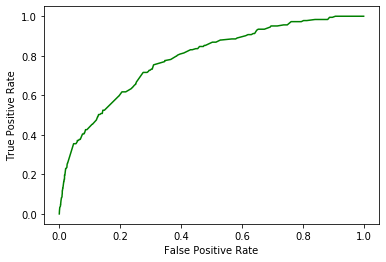

In [112]:
from sklearn import metrics
y_pred_proba = model.predict(X_train)
fpr, tpr, _ = metrics.roc_curve(y_train,y_pred_proba)
#create ROC curve`
plt.plot(fpr,tpr,color="green")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Predictions on Test Dataset

In [113]:
test=pd.concat([X_test,y_test],axis=1)
test['Probability']=model.predict(X_test)
test['Predicted']=np.where(test['Probability'] > 0.5,1,0)  #thershold  >0.6

In [114]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(test.Predicted,test.Flag)
print(matrix)
accuracy=(matrix[0][0]+matrix[1][1])/len(test)*100
print("Logistic Regression(Testing accuracy): "+str(round(accuracy,2))+"%")

[[1290   35]
 [   1    0]]
Logistic Regression(Testing accuracy): 97.29%


In [115]:
from sklearn.metrics  import classification_report 
print(classification_report(y_test, test.Predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1291
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1326
   macro avg       0.49      0.50      0.49      1326
weighted avg       0.95      0.97      0.96      1326



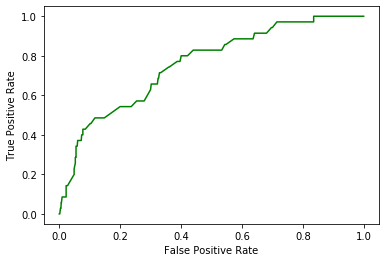

In [116]:
from sklearn import metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,color="green")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Step 4 - Kolmogorav Smirnov Stat

The Kolmogorav Smirnov stat also known as ks stat is the meassure of the degree of seperation between the positive and the negative distributions. So if the model is able to seperate the distribution into two seperate groups in which one group contains all positives and other has all negatives, the value for ks is 100. On the other hand when the seperation is done randomly, the value for ks is 0.

Hence the value for ks ranges from 0-100.

It calculates the vertical distance between the cumulative distribution functions of the two classificartions, which in our case is Good and Bad.

The maximum vertical distance between the functions is selected to be the threshold for making the decisions about classifying as good or bad.

##### KS Tables

In [117]:
PD_train = pd.DataFrame({'Bad':train['Flag'] ,'Prob_Def': model.predict(X_train)})
PD_test = pd.DataFrame({'Bad':test['Flag'],'Prob_Def': model.predict(X_test)})

In [118]:
PD_train['decile'] = pd.qcut(PD_train['Prob_Def'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
PD_test['decile'] = pd.qcut(PD_test['Prob_Def'],10,labels=['1','2','3','4','5','6','7','8','9','10'])

In [119]:
PD_train['Good'] = 1-PD_train['Bad']
PD_test['Good'] = 1-PD_test['Bad']

In [120]:
def ksStat(dataset):
    df1 = pd.pivot_table(data=dataset,index=['decile'],values=['Bad','Good','Prob_Def'],
                     aggfunc={'Prob_Def' : [np.min,np.max],'Bad':[np.sum],
                              'Good':[np.sum]})
    df1.reset_index()
    df1.columns = ['Bad_Count','Good_Count','max_prob','min_prob']
    df1['Total_Cust'] = df1['Bad_Count']+df1['Good_Count']
    df1['Bad_Rate'] = round(df1['Bad_Count'] / df1['Total_Cust'],2)
    df2 = df1.sort_values(by="Bad_Rate",ascending=False)

    default_sum = df2['Bad_Count'].sum()
    non_default_sum = df2['Good_Count'].sum()
    total_sum=df2['Total_Cust'].sum()

    df2["Population%"]=(df2["Total_Cust"]/(df2['Total_Cust'].sum())).apply('{0:.2%}'.format)

    df2['Cum_Bad%'] = (np.round(((df2['Bad_Count'] / df2['Bad_Count'].sum()).cumsum()), 2))

    df2['Cum_Good%'] = (np.round(((df2['Good_Count'] / df2['Good_Count'].sum()).cumsum()), 2))

    df2["KS_Stat"]=df2["Cum_Bad%"]-df2["Cum_Good%"]


    flag = lambda x: '*****' if x == df2['KS_Stat'].max() else ''
    df2['max_ks'] = df2['KS_Stat'].apply(flag)
    df2=df2.sort_values(by="decile",ascending=True)

    fig, ax = plt.subplots()
    ax.plot(df2.index.tolist(),df2["Cum_Bad%"]*100,marker="o",label="Bad",color="Red")
    ax.plot(df2.index.tolist(),df2["Cum_Good%"]*100,marker="o",label="Good",color="Green")
    ax.set(xlabel='Deciles', ylabel='Cumulative Count %',
       title='KS-Chart')
    ax.grid()
    plt.legend()
    plt.yticks(np.arange(0,110,10))
    plt.show()

    df2=df2.sort_values(by="Bad_Rate",ascending=False)
    df2["Bad_Rate"]=df2["Bad_Rate"].apply('{0:.2%}'.format)
    df2['Cum_Good%'] =df2['Cum_Good%'].apply('{0:.2%}'.format)
    df2['Cum_Bad%'] =df2['Cum_Bad%'].apply('{0:.2%}'.format)
    df2['KS_Stat'] =df2['KS_Stat'].apply('{0:.2%}'.format)
    return df2
    

##### Train data

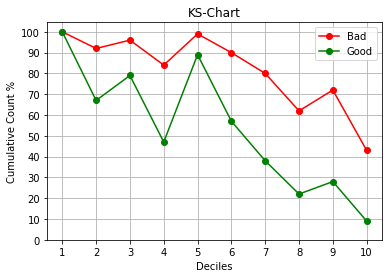

,Bad_Count,Good_Count,max_prob,min_prob,Total_Cust,Bad_Rate,Population%,Cum_Bad%,Cum_Good%,KS_Stat,max_ks
decile,,,,,,,,,,,
10,78,445,0.500036,0.065709,523,15.00%,9.86%,43.00%,9.00%,34.00%,
8,35,689,0.048837,0.035802,724,5.00%,13.65%,62.00%,22.00%,40.00%,
9,18,314,0.065393,0.049204,332,5.00%,6.26%,72.00%,28.00%,44.00%,*****
7,15,522,0.035036,0.025097,537,3.00%,10.13%,80.00%,38.00%,42.00%,
4,8,449,0.013994,0.011057,457,2.00%,8.62%,84.00%,47.00%,37.00%,
6,10,488,0.024257,0.019443,498,2.00%,9.39%,90.00%,57.00%,33.00%,
2,4,529,0.006926,0.004619,533,1.00%,10.05%,92.00%,67.00%,25.00%,
3,7,589,0.010691,0.007205,596,1.00%,11.24%,96.00%,79.00%,17.00%,
5,7,543,0.019077,0.014589,550,1.00%,10.37%,99.00%,89.00%,10.00%,


In [121]:
ksStat(PD_train)

##### Test Data

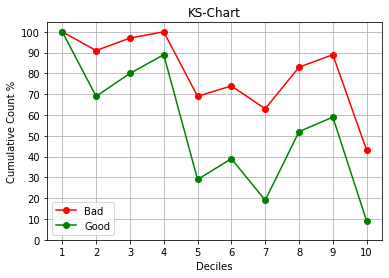

,Bad_Count,Good_Count,max_prob,min_prob,Total_Cust,Bad_Rate,Population%,Cum_Bad%,Cum_Good%,KS_Stat,max_ks
decile,,,,,,,,,,,
10,15,110,0.500036,0.065393,125,12.00%,9.43%,43.00%,9.00%,34.00%,
7,7,140,0.038412,0.026128,147,5.00%,11.09%,63.00%,19.00%,44.00%,*****
5,2,129,0.019077,0.014905,131,2.00%,9.88%,69.00%,29.00%,40.00%,
6,2,128,0.025634,0.019443,130,2.00%,9.80%,74.00%,39.00%,35.00%,
8,3,169,0.048837,0.038799,172,2.00%,12.97%,83.00%,52.00%,31.00%,
9,2,81,0.064945,0.049508,83,2.00%,6.26%,89.00%,59.00%,30.00%,
2,1,129,0.006926,0.004663,130,1.00%,9.80%,91.00%,69.00%,22.00%,
3,2,146,0.010691,0.007205,148,1.00%,11.16%,97.00%,80.00%,17.00%,
4,1,122,0.014696,0.011057,123,1.00%,9.28%,100.00%,89.00%,11.00%,


In [122]:
ksStat(PD_test)

#### Step 5 - Population Stability Index (PSI)

In [123]:
df1 = pd.pivot_table(data=PD_train,index=['decile'],values=["Bad","Good"],
                     aggfunc={"Bad":[np.sum],"Good":[np.sum]})
df1.reset_index()
df1.columns = ['Bad_Count','Good_Count']
df1['DevPop'] = df1['Bad_Count']+df1['Good_Count']
    
df2 = pd.pivot_table(data=PD_test,index=['decile'],values=["Bad","Good"],
                     aggfunc={"Bad":[np.sum],"Good":[np.sum]})
df2.reset_index()
df2.columns = ['Bad_Count','Good_Count']
df2['CurrPop'] = df2['Bad_Count']+df2['Good_Count']

df3=pd.concat([df1["DevPop"],df2["CurrPop"]],axis=1)   
df3["DevPop%(Actual)"]=df3["DevPop"]/sum(df3["DevPop"])
df3["CurrPop%(Expected)"]=df3["CurrPop"]/sum(df3["CurrPop"])
df3["Actual-Expected"]=df3["DevPop%(Actual)"]-df3["CurrPop%(Expected)"]
df3["ln(Actual/Expected)"]=np.log(df3["DevPop%(Actual)"]/df3["CurrPop%(Expected)"])
df3["Index"]=round(df3["Actual-Expected"]*df3["ln(Actual/Expected)"],6)
psi=sum(df3["Index"])
print("PSI value =",psi)

df3=df3.sort_values(by="decile",ascending=False)
df3["DevPop%(Actual)"]=df3["DevPop%(Actual)"].apply('{0:.2%}'.format)
df3["CurrPop%(Expected)"]=df3["CurrPop%(Expected)"].apply('{0:.2%}'.format)
df3["Actual-Expected"]=df3["Actual-Expected"].apply('{0:.2%}'.format)
df3["ln(Actual/Expected)"]=df3["ln(Actual/Expected)"].apply('{0:.2%}'.format)
df3

PSI value = 0.002392


,DevPop,CurrPop,DevPop%(Actual),CurrPop%(Expected),Actual-Expected,ln(Actual/Expected),Index
decile,,,,,,,
10,523,125,9.86%,9.43%,0.44%,4.52%,0.000197
9,332,83,6.26%,6.26%,0.00%,0.02%,0.000000
8,724,172,13.65%,12.97%,0.68%,5.12%,0.000349
7,537,147,10.13%,11.09%,-0.96%,-9.05%,0.000869
6,498,130,9.39%,9.80%,-0.41%,-4.30%,0.000178
5,550,131,10.37%,9.88%,0.49%,4.86%,0.000239
4,457,123,8.62%,9.28%,-0.66%,-7.36%,0.000485
3,596,148,11.24%,11.16%,0.08%,0.69%,0.000005
2,533,130,10.05%,9.80%,0.25%,2.49%,0.000061
